In [1]:
import pandas as pd
import soundfile as sf
from pydub import AudioSegment
import tqdm
import matplotlib.pyplot as plt
import librosa
import seaborn as sns
from jiwer import wer
from jiwer import cer

ModuleNotFoundError: No module named 'jiwer'

In [ ]:
pip install jiwer

In [ ]:
import jiwer

# Define the reference and hypothesis texts
reference = "hello world this is a test world"
hypothesis = "hello test this is the world"

# Use jiwer to compute the detailed error measures
measures = jiwer.compute_measures(reference, hypothesis)

# Print the detailed information
print(f"WER: {measures['wer']:.2f}")
print(f"Substitutions: {measures['substitutions']}")
print(f"Insertions: {measures['insertions']}")
print(f"Deletions: {measures['deletions']}")


# **Train Split**

# *NISQA analysis*

In [2]:
# Load the NISQA results
df_qa = pd.read_csv("/kaggle/input/interspeech-nisqa-metrics/NISQA_train_results.csv",sep=",")
df_qa.rename(columns={'deg':'id'},inplace=True) ## rename to match other dfs
df_qa['id'] = df_qa['id'].apply(lambda x:x.split('.')[0])  ## remove .wav
df_qa.sort_values('mos_pred',ascending=True,inplace=True) ## sort by mean overall score
df_qa

,id,mos_pred,noi_pred,dis_pred,col_pred,loud_pred,model
1108,train_barishal_0324,0.344373,1.456520,2.208328,0.918633,1.187877,NISQAv2
11453,train_barishal_0323,0.430722,1.943747,2.365363,1.354021,1.246295,NISQAv2
9159,train_barishal_0178,0.575805,2.061698,2.434598,1.177764,1.274931,NISQAv2
4940,train_habiganj_0902,0.602632,1.277485,1.936764,1.365223,1.353952,NISQAv2
9221,train_sandwip_0556,0.607834,1.354925,1.547713,1.529125,1.551721,NISQAv2
...,...,...,...,...,...,...,...
8062,train_sylhet_4729,4.777790,4.440412,4.780240,4.485718,4.681598,NISQAv2
7243,train_sylhet_4755,4.814790,4.545526,4.725386,4.282749,4.526661,NISQAv2
13652,train_sylhet_3982,4.815849,4.560162,4.754669,4.466955,4.687034,NISQAv2
6693,train_sylhet_4733,4.831680,4.499462,4.821542,4.426102,4.586123,NISQAv2


In [ ]:
# ood_qa = pd.read_csv("/kaggle/input/bengaliai-speech-train-nisqa/NISQA_wavfiles.csv",sep=",")
# ood_qa.rename(columns={'deg':'id'},inplace=True) ## rename to match other dfs
# ood_qa['id'] = ood_qa['id'].apply(lambda x:x.split('.')[0])  ## remove .wav
# ood_qa.sort_values('mos_pred',ascending=True,inplace=True) ## sort by mean overall score
# ood_qa

In [ ]:
# ## Listen to lowest overall quality samples

# path = "/kaggle/input/ben10/ben10/16_kHz_train_audio/"
# file = "train_habiganj (909)" 

# # The sample contains lots of background noise,
# # interference of others, mobile ringing etc.

# print(file)
# display(AudioSegment.from_file(path+file+'.wav'))
# # df[df['id']==file].sentence.tolist()[0] 
# pd.set_option('display.max_colwidth', None)
# print(df[df['file_name']==file+'.wav'].transcriptions)
# pd.reset_option('display.max_colwidth')

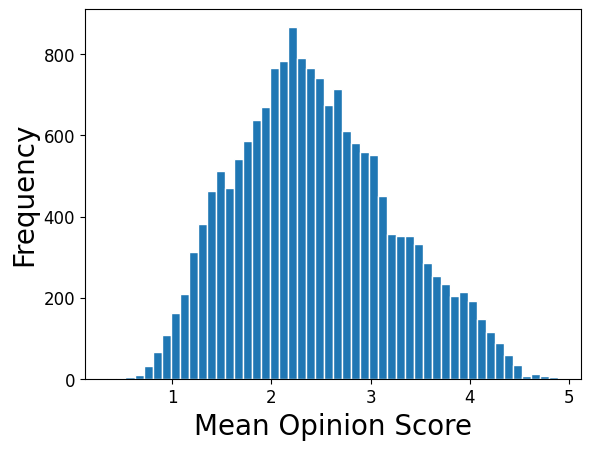

In [3]:
#df_qa['mos_pred'].hist(bins=100)

df_qa['mos_pred'].plot(kind='hist', bins=50 ,edgecolor='white')
plt.xlabel('Mean Opinion Score',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Train MOS.pdf',bbox_inches='tight',dpi=100)
plt.show()

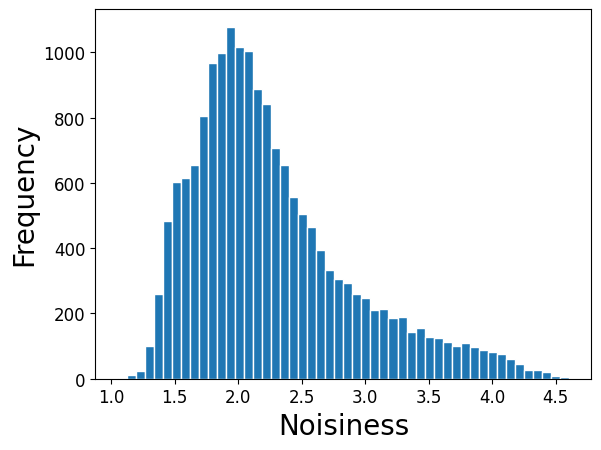

In [4]:
df_qa['noi_pred'].plot(kind='hist', bins=50,edgecolor='white')
plt.xlabel('Noisiness',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Train Noisiness.pdf',bbox_inches='tight',dpi=100)
plt.show()

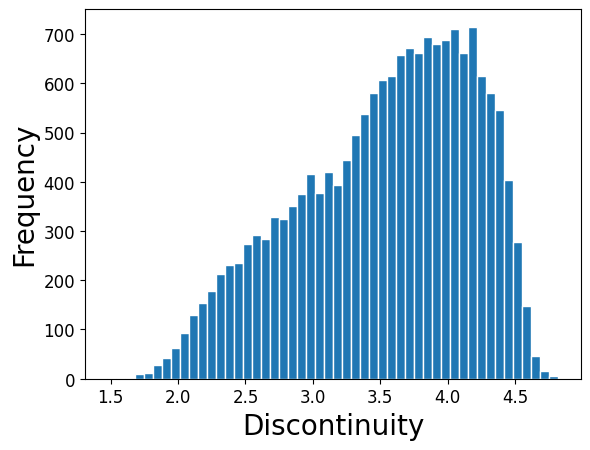

In [5]:
df_qa['dis_pred'].plot(kind='hist', bins=50,edgecolor='white')
plt.xlabel('Discontinuity',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Train Disc.pdf',bbox_inches='tight',dpi=100)
plt.show()

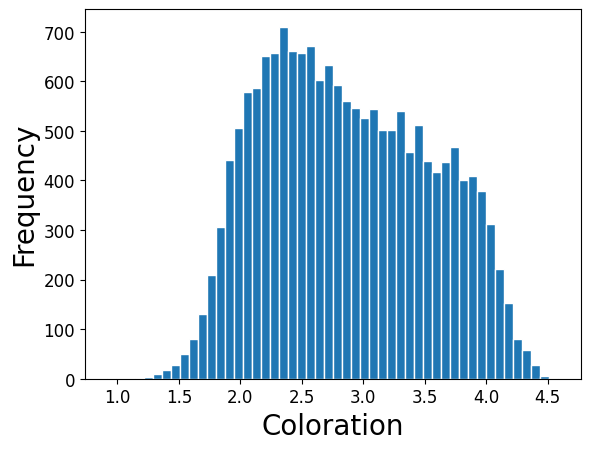

In [6]:
df_qa['col_pred'].plot(kind='hist', bins=50 ,edgecolor='white')
plt.xlabel('Coloration',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Train Col.pdf',bbox_inches='tight',dpi=100)

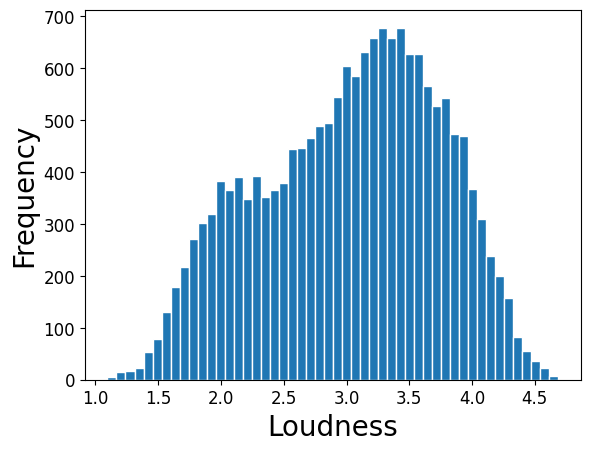

In [7]:
df_qa['loud_pred'].plot(kind='hist', bins=50,edgecolor='white')
plt.xlabel('Loudness',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Train Loud.pdf',bbox_inches='tight',dpi=100)
plt.show()

In [8]:
# ood_qa['mos_pred'].plot(kind='hist', bins=50 ,edgecolor='white')
# plt.xlabel('Mean Opinion Score',fontsize=20)
# plt.ylabel('Frequency',fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.savefig('/kaggle/working/Train MOS.pdf',bbox_inches='tight',dpi=100)
# plt.show()

In [9]:
# import matplotlib.pyplot as plt

# # Plot histogram for the ben10 dataset
# df_qa['mos_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5,label='ben10')

# # Plot histogram for the OOD Speech dataset
# ood_qa['mos_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, label='OOD Speech')

# # Add labels and legend
# plt.xlabel('Mean Opinion Score', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=12)

# # Save the figure if needed
# # plt.savefig('/kaggle/working/Compare_MOS.pdf', bbox_inches='tight', dpi=100)

# # Show the plot
# plt.show()


In [10]:
# Understanding the density metric

# import matplotlib.pyplot as plt
# import numpy as np

# # Plot histogram for the ben10 dataset with density=False to get frequencies
# count_ben10, bins_ben10, _ = plt.hist(df_qa['mos_pred'], bins=50, edgecolor='white', alpha=0.5, label='ben10', density=False)

# # Plot histogram for the OOD Speech dataset with density=False to get frequencies
# count_ood, bins_ood, _ = plt.hist(ood_qa['mos_pred'], bins=50, edgecolor='white', alpha=0.5, label='OOD Speech', density=False)

# # Calculate total samples for each dataset
# # N_ben10 = len(df_qa['mos_pred'])
# # N_OOD = len(ood_qa['mos_pred'])

# # # Bin width
# # bin_width = bins_ben10[1] - bins_ben10[0]

# # # Plot the density histogram for ben10
# # density_ben10 = count_ben10 / (N_ben10 * bin_width)
# # plt.hist(df_qa['mos_pred'], bins=50, edgecolor='white', alpha=0.5, label='ben10', density=True)

# # # Plot the density histogram for OOD Speech
# # density_ood = count_ood / (N_OOD * bin_width)
# # plt.hist(ood_qa['mos_pred'], bins=50, edgecolor='white', alpha=0.5, label='OOD Speech', density=True)

# # Add labels and legend
# plt.xlabel('Mean Opinion Score', fontsize=20)
# plt.ylabel('Density', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=12)

# # Save the figure if needed
# # plt.savefig('/kaggle/working/Compare_MOS.pdf', bbox_inches='tight', dpi=100)

# # Show the plot
# plt.show()

# # Print total frequencies for verification
# print("Total frequencies for ben10 dataset:", np.sum(count_ben10))
# print("Total frequencies for OOD Speech dataset:", np.sum(count_ood))

# print((count_ben10))


In [11]:
# import matplotlib.pyplot as plt

# # Plot histogram for the ben10 dataset
# df_qa['mos_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, density = True,label='ben10')

# # Plot histogram for the OOD Speech dataset
# ood_qa['mos_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, density=True, label='OOD Speech')

# # Add labels and legend
# plt.xlabel('Mean Opinion Score', fontsize=20)
# plt.ylabel('Relative Density', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=12)

# # Save the figure if needed
# plt.savefig('/kaggle/working/Compare_MOS.pdf', bbox_inches='tight', dpi=100)

# # Show the plot
# plt.show()


In [12]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Compute the histogram for ben10 dataset
# ben10_hist, ben10_bins = np.histogram(df_qa['mos_pred'], bins=50, density=True)

# # Compute the histogram for OOD Speech dataset
# ood_hist, ood_bins = np.histogram(ood_qa['mos_pred'], bins=50, density=True)

# # Plot histogram for the ben10 dataset
# plt.hist(df_qa['mos_pred'], bins=50, edgecolor='white', alpha=0.5, density=True, label='ben10')

# # Plot histogram for the OOD Speech dataset
# plt.hist(ood_qa['mos_pred'], bins=50, edgecolor='white', alpha=0.5, density=True, label='OOD Speech')

# # Add labels and legend
# plt.xlabel('Mean Opinion Score', fontsize=20)
# plt.ylabel('Relative Density', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=12)

# # Show the plot
# plt.show()

# # Verify the densities
# print(f"Sum of ben10 histogram densities: {np.sum(ben10_hist * np.diff(ben10_bins))}")
# print(f"Sum of OOD Speech histogram densities: {np.sum(ood_hist * np.diff(ood_bins))}")
# print('OOD BINS : ',ood_hist * np.diff(ben10_bins))
# print('Ben10 BINS : ',ben10_hist * np.diff(ben10_bins))



In [13]:
# import matplotlib.pyplot as plt

# # Plot histogram for the ben10 dataset
# df_qa['noi_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, density = True,label='ben10')

# # Plot histogram for the OOD Speech dataset
# ood_qa['noi_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, density=True, label='OOD Speech')

# # Add labels and legend
# plt.xlabel('Noisiness', fontsize=20)
# plt.ylabel('Relative Density', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=12)

# # Save the figure if needed
# plt.savefig('/kaggle/working/Compare_noi.pdf', bbox_inches='tight', dpi=100)

# # Show the plot
# plt.show()


In [14]:
# import matplotlib.pyplot as plt

# # Plot histogram for the ben10 dataset
# df_qa['dis_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, density = True,label='ben10')

# # Plot histogram for the OOD Speech dataset
# ood_qa['dis_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, density=True, label='OOD Speech')

# # Add labels and legend
# plt.xlabel('Discontinuity', fontsize=20)
# plt.ylabel('Relative Density', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=12)

# # Save the figure if needed
# plt.savefig('/kaggle/working/Compare_dis.pdf', bbox_inches='tight', dpi=100)

# # Show the plot
# plt.show()


In [15]:
# import matplotlib.pyplot as plt

# # Plot histogram for the ben10 dataset
# df_qa['col_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, density = True,label='ben10')

# # Plot histogram for the OOD Speech dataset
# ood_qa['col_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, density=True, label='OOD Speech')

# # Add labels and legend
# plt.xlabel('Coloration', fontsize=20)
# plt.ylabel('Relative Density', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=12)

# # Save the figure if needed
# plt.savefig('/kaggle/working/Compare_col.pdf', bbox_inches='tight', dpi=100)

# # Show the plot
# plt.show()


In [16]:
# import matplotlib.pyplot as plt

# # Plot histogram for the ben10 dataset
# df_qa['loud_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, density = True,label='ben10')

# # Plot histogram for the OOD Speech dataset
# ood_qa['loud_pred'].plot(kind='hist', bins=50, edgecolor='white', alpha=0.5, density=True, label='OOD Speech')

# # Add labels and legend
# plt.xlabel('Loudness', fontsize=20)
# plt.ylabel('Relative Density', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=12)

# # Save the figure if needed
# plt.savefig('/kaggle/working/Compare_loud.pdf', bbox_inches='tight', dpi=100)

# # Show the plot
# plt.show()


In [17]:
## lets threshold at the notch in the histogram

df_qa[df_qa.mos_pred>1.5].sort_values('mos_pred',ascending=True).head()

,id,mos_pred,noi_pred,dis_pred,col_pred,loud_pred,model
15591,train_habiganj_0246,1.500030,2.403689,3.511635,2.301068,1.656483,NISQAv2
4763,train_sandwip_0383,1.500196,1.981088,3.335212,2.086539,1.635581,NISQAv2
10268,train_sandwip_0868,1.500324,1.798431,3.054253,2.090571,1.858691,NISQAv2
4453,train_tangail_0607,1.500579,2.133088,3.473811,1.988468,1.754782,NISQAv2
5120,train_rangpur_0659,1.500806,3.162290,2.558265,1.686320,2.804906,NISQAv2


# **Validation Split**

# *NISQA Analysis*

In [18]:
dfv_qa = pd.read_csv("/kaggle/input/interspeech-nisqa-metrics/NISQA_valid_results.csv",sep=",")
dfv_qa.rename(columns={'deg':'id'},inplace=True) ## rename to match other dfs
dfv_qa['id'] = dfv_qa['id'].apply(lambda x:x.split('.')[0])  ## remove .wav
dfv_qa.sort_values('mos_pred',ascending=True,inplace=True) ## sort by mean overall score
dfv_qa

,id,mos_pred,noi_pred,dis_pred,col_pred,loud_pred,model
1311,valid_narsingdi_0135,0.842335,1.362066,1.985647,1.971837,1.939905,NISQAv2
1764,valid_kishoreganj_0197,0.961818,1.577113,2.337398,1.350364,1.304367,NISQAv2
1517,valid_narsingdi_0137,1.019152,1.415282,2.345332,1.990692,2.462381,NISQAv2
1249,valid_sylhet_0342,1.032498,1.719300,3.067313,1.619467,1.344977,NISQAv2
475,valid_narail_0168,1.052434,1.796990,2.731288,1.520530,1.897177,NISQAv2
...,...,...,...,...,...,...,...
1303,valid_narsingdi_0094,4.302607,3.793263,4.657683,4.341533,3.853539,NISQAv2
645,valid_narsingdi_0095,4.315245,3.781192,4.606601,4.287716,4.293837,NISQAv2
1628,valid_narsingdi_0096,4.369886,3.866923,4.707196,4.501819,4.154469,NISQAv2
121,valid_narsingdi_0091,4.371687,3.880511,4.640528,4.384272,4.004192,NISQAv2


In [19]:
# ## Listen to lowest overall quality samples

# path = "/kaggle/input/ben10/ben10/16_kHz_valid_audio/"
# file = "valid_sylhet (144)" 

# # The sample contains lots of background noise,
# # interference of others, mobile ringing etc.

# print(file)
# display(AudioSegment.from_file(path+file+'.wav'))
# # df[df['id']==file].sentence.tolist()[0] 
# pd.set_option('display.max_colwidth', None)
# print('Transcript: Not Publicly Available for Validation Set')
# #print(dfv[dfv['file_name']==file+'.wav'].transcripts)
# pd.reset_option('display.max_colwidth')

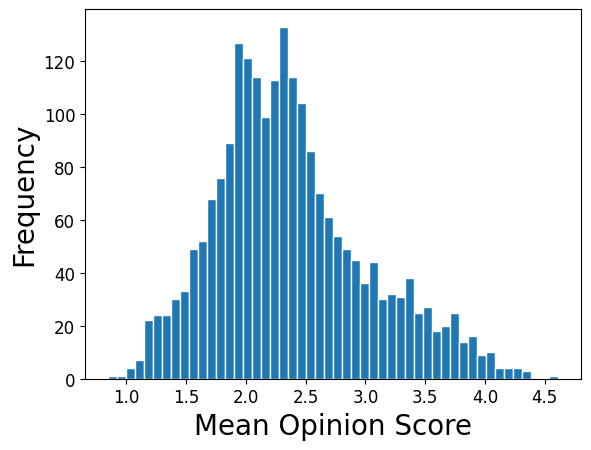

In [20]:
dfv_qa['mos_pred'].plot(kind='hist', bins=50 ,edgecolor='white')
plt.xlabel('Mean Opinion Score',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Val MOS.pdf',bbox_inches='tight',dpi=100)
plt.show()

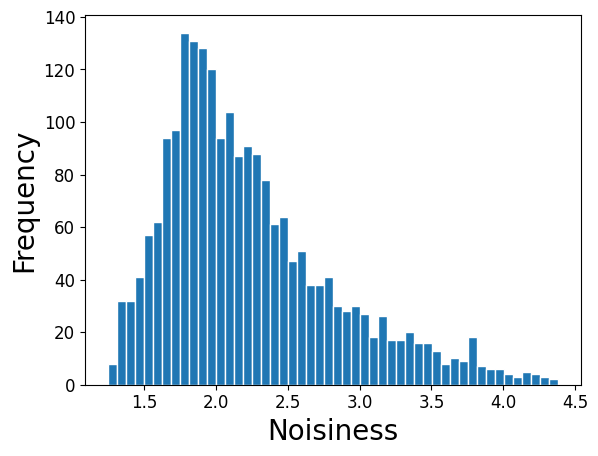

In [21]:
dfv_qa['noi_pred'].plot(kind='hist', bins=50 ,edgecolor='white')
plt.xlabel('Noisiness',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Val Noisiness.pdf',bbox_inches='tight',dpi=100)

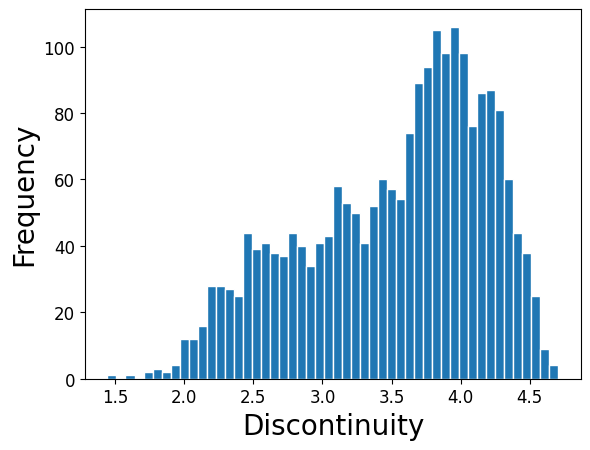

In [22]:
dfv_qa['dis_pred'].plot(kind='hist', bins=50 ,edgecolor='white')
plt.xlabel('Discontinuity',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Val Disc.pdf',bbox_inches='tight',dpi=100)
plt.show()

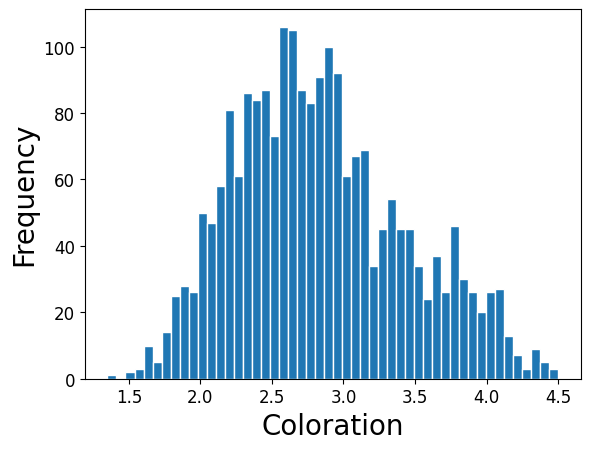

In [23]:
dfv_qa['col_pred'].plot(kind='hist', bins=50 ,edgecolor='white')
plt.xlabel('Coloration',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Val Col.pdf',bbox_inches='tight',dpi=100)
plt.show()

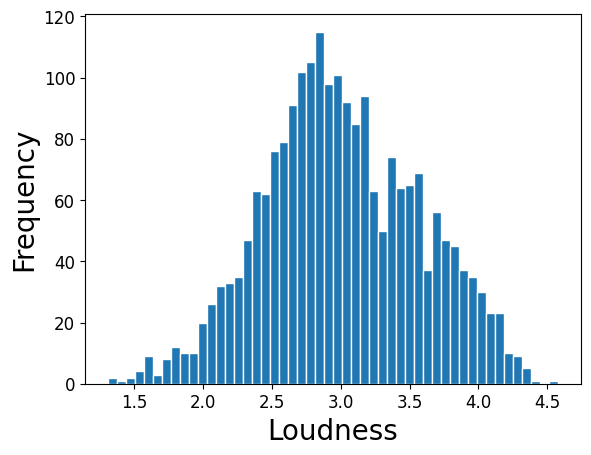

In [24]:
dfv_qa['loud_pred'].plot(kind='hist', bins=50 ,edgecolor='white')
plt.xlabel('Loudness',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Val Loud.pdf',bbox_inches='tight',dpi=100)
plt.show()

In [ ]:
dfv_qa

# ****Test Split****

# *NISQA Analysis*

In [22]:
df_qta = pd.read_csv("/kaggle/input/interspeech-nisqa-metrics/NISQA_test_results.csv",sep=",")
df_qta.rename(columns={'deg':'id'},inplace=True) ## rename to match other dfs
df_qta['id'] = df_qta['id'].apply(lambda x:x.split('.')[0])  ## remove .wav
df_qta.sort_values('mos_pred',ascending=True,inplace=True) ## sort by mean overall score
df_qta

,id,mos_pred,noi_pred,dis_pred,col_pred,loud_pred,model
945,test_sandwip_0103,0.958261,1.775807,2.995914,1.572525,1.447910,NISQAv2
1767,test_habiganj_0002,0.977058,1.284016,1.899029,1.871239,1.710874,NISQAv2
47,test_habiganj_0021,0.998523,1.587512,2.005267,1.729081,1.597314,NISQAv2
891,test_kishoreganj_0199,1.054285,1.874762,2.297478,1.614278,1.500284,NISQAv2
1911,test_sylhet_0459,1.063912,1.876579,2.360203,1.666435,1.551065,NISQAv2
...,...,...,...,...,...,...,...
1421,test_kishoreganj_0159,3.908457,3.145085,4.526169,4.127506,4.146450,NISQAv2
1858,test_kishoreganj_0018,3.911036,3.851278,4.484886,4.337797,4.415219,NISQAv2
1347,test_rangpur_0011,3.948737,3.486269,4.478223,4.304366,3.922664,NISQAv2
1624,test_kishoreganj_0017,4.206080,4.041099,4.556040,4.392869,4.391333,NISQAv2


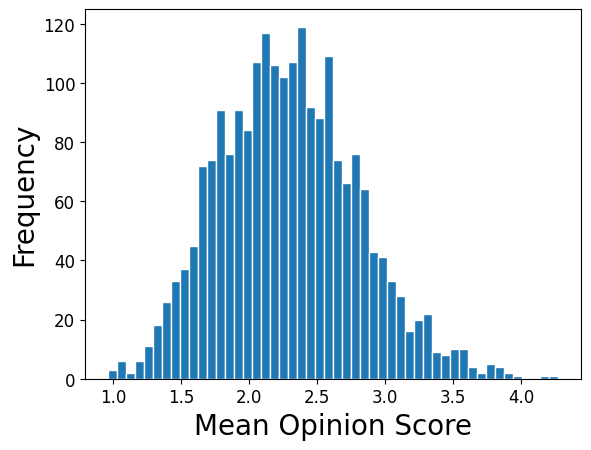

In [25]:
df_qta['mos_pred'].plot(kind='hist', bins=50,edgecolor='white')
plt.xlabel('Mean Opinion Score',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Test MOS.pdf',bbox_inches='tight',dpi=100)

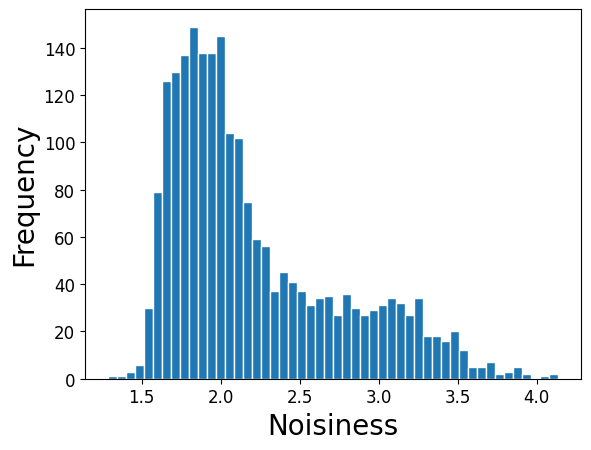

In [26]:
# df_qta['noi_pred'].plot(kind='hist', bins=100 , title='Distribution of Noisiness in Test Set' , xlabel='x axis')
# plt.savefig('/kaggle/working/Test Noisiness.pdf',bbox_inches='tight',dpi=100)

df_qta['noi_pred'].plot(kind='hist', bins=50,edgecolor='white')
plt.xlabel('Noisiness',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Test Noisiness.pdf',bbox_inches='tight',dpi=100)

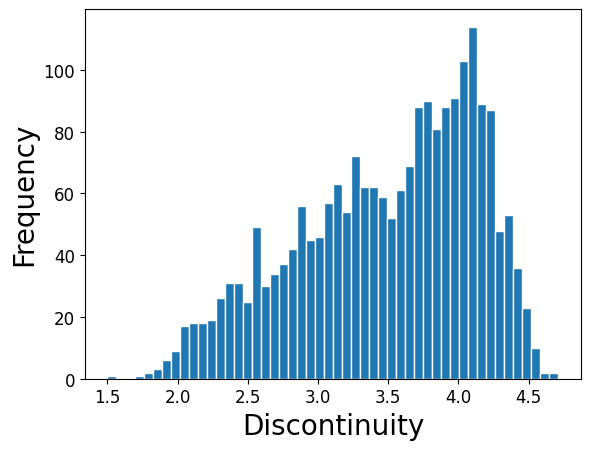

In [27]:
# df_qta['dis_pred'].plot(kind='hist', bins=100 , title='Distribution of Discontinuity in Test Set' , xlabel='x axis')
# plt.savefig('/kaggle/working/Test Disc.pdf',bbox_inches='tight',dpi=100)

df_qta['dis_pred'].plot(kind='hist', bins=50,edgecolor='white')
plt.xlabel('Discontinuity',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Test Disc.pdf',bbox_inches='tight',dpi=100)

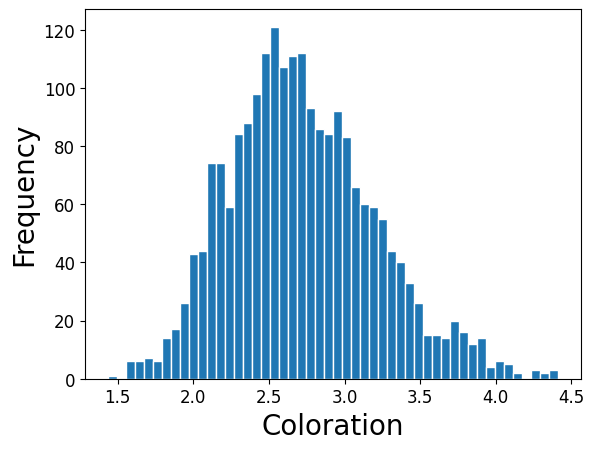

In [28]:
# df_qta['col_pred'].plot(kind='hist', bins=100 , title='Distribution of Coloration in Test Set' , xlabel='x axis')
# plt.savefig('/kaggle/working/Test Col.pdf',bbox_inches='tight',dpi=100)

df_qta['col_pred'].plot(kind='hist', bins=50,edgecolor='white')
plt.xlabel('Coloration',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Test Col.pdf',bbox_inches='tight',dpi=100)

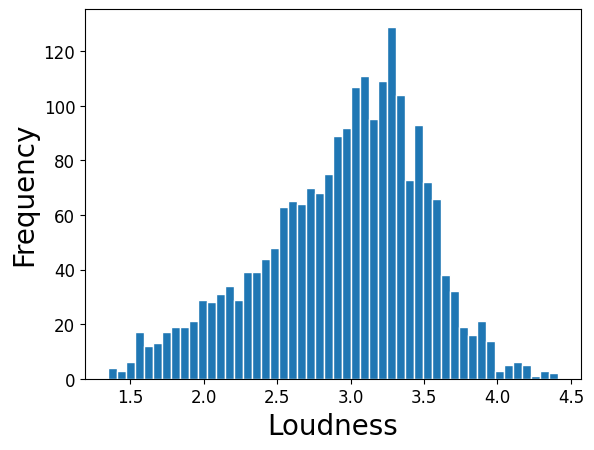

In [29]:
# df_qta['loud_pred'].plot(kind='hist', bins=100 , title='Distribution of Loudness in Test Set' , xlabel='x axis')
# plt.savefig('/kaggle/working/Test Loud.pdf',bbox_inches='tight',dpi=100)

df_qta['loud_pred'].plot(kind='hist', bins=50,edgecolor='white')
plt.xlabel('Loudness',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/kaggle/working/Test Loud.pdf',bbox_inches='tight',dpi=100)

In [ ]:
df_qta.head()

# *WER and CER*

In [30]:
df_qta['district'] = df_qta['id'].str.extract(r'test_([a-zA-Z]+)')
grouped_df_qta = df_qta.groupby('district')[['mos_pred','noi_pred','dis_pred','col_pred','loud_pred']].sum().reset_index()
grouped_df_qta.columns = ['district', 'total_mos', 'total_noi','total_dis','total_col','total_loud']
entry_count = df_qta.groupby('district').size().reset_index(name='entry_count')
grouped_df_qta = grouped_df_qta.merge(entry_count, on='district')
grouped_df_qta['avg_mos'] = grouped_df_qta['total_mos']/grouped_df_qta['entry_count']
grouped_df_qta['avg_noi'] = grouped_df_qta['total_noi']/grouped_df_qta['entry_count']
grouped_df_qta['avg_dis'] = grouped_df_qta['total_dis']/grouped_df_qta['entry_count']
grouped_df_qta['avg_col'] = grouped_df_qta['total_col']/grouped_df_qta['entry_count']
grouped_df_qta['avg_loud'] = grouped_df_qta['total_loud']/grouped_df_qta['entry_count']


grouped_df_qta.head()

,district,total_mos,total_noi,total_dis,total_col,total_loud,entry_count,avg_mos,avg_noi,avg_dis,avg_col,avg_loud
0,barishal,216.694776,193.232455,357.612542,278.944554,294.196148,101,2.145493,1.913193,3.540718,2.761827,2.912833
1,chittagong,497.946785,504.787626,661.747199,430.334015,576.716756,176,2.829243,2.868112,3.759927,2.445080,3.276800
2,comilla,108.886506,71.431949,135.904997,121.067563,117.705140,32,3.402703,2.232248,4.247031,3.783361,3.678286
3,habiganj,192.986647,204.359254,357.122230,252.830667,256.690439,117,1.649459,1.746660,3.052327,2.160946,2.193935
4,jhenaidah,28.748463,32.283695,47.764541,33.515702,34.067003,15,1.916564,2.152246,3.184303,2.234380,2.271134


In [ ]:
merged_df = pd.merge(df_err, grouped_df_qta, left_on='Districts', right_on='district')

# Calculate the correlation matrix
columns_to_correlate = ['avg_mos', 'avg_noi', 'avg_dis', 'avg_col', 'avg_loud', 'WER', 'CER']
correlation_matrix = merged_df[columns_to_correlate].corr()

# Filter the correlation matrix to only include the metrics with WER and CER
correlation_with_wer_cer = correlation_matrix.loc[['WER', 'CER'], ['avg_mos', 'avg_noi', 'avg_dis', 'avg_col', 'avg_loud']]

# Print the filtered correlation matrix
print(correlation_with_wer_cer)

In [ ]:
correlation_matrix
correlation_matrix.to_csv('Correlation_matrix.csv')

In [ ]:
plt.figure(figsize=(5, 1))  # Optional: Adjust the figure size
sns.heatmap(correlation_with_wer_cer, annot=True, cmap='coolwarm', fmt='.2f')

# Customize the plot
# plt.title('Correlation Matrix')
plt.savefig('/kaggle/working/Correlation_Heatmap_wer_cer.pdf',bbox_inches='tight',dpi=100)
plt.show()

In [ ]:
df_oinf = pd.read_csv("/kaggle/input/test-data-inference/original_inference.csv",sep=",")
df_oinf.rename(columns={'file_name':'id'},inplace=True) ## rename to match other dfs
df_oinf['id'] = df_oinf['id'].apply(lambda x:x.split('.')[0])  ## remove .wav
df_oinf['id'] = df_oinf['id'].str.replace('16kHz_test_audio/', '') ## remove  pre-text
df_oinf.head(10)

In [ ]:
df_tinf = pd.read_csv("/kaggle/input/test-data-inference/trained_inference.csv",sep=",")
df_tinf.rename(columns={'file_name':'id'},inplace=True) ## rename to match other dfs
df_tinf['id'] = df_tinf['id'].apply(lambda x:x.split('.')[0])  ## remove .wav
df_tinf['id'] = df_tinf['id'].str.replace('16kHz_test_audio/', '') ## remove  pre-text
df_tinf.head(10)

In [ ]:
df_tinf['wer'] = df_tinf.apply(lambda row: wer(row['transcripts'], row['sentence']), axis=1)
df_tinf['cer'] = df_tinf.apply(lambda row: cer(row['transcripts'], row['sentence']), axis=1)

# Display the DataFrame with WER values
df_tinf.head(100)

In [ ]:
sorted_df = df_tinf.sort_values(by='wer', ascending=True)
sorted_df

In [ ]:
df_qta.head()

In [ ]:
merged_df = pd.merge(df_tinf, df_qta,on='id')
merged_df['district'] = merged_df['id'].str.extract(r'test_([a-zA-Z]+)')
merged_df.head()

In [ ]:
merged_df['district'].unique()

In [ ]:
Districts = ['chittagong','kishoreganj','narsingdi','narail', 'rangpur','tangail', 'habiganj', 'barishal', 'sylhet']
wer_results = []
cer_results = []
metrics = ['mos_pred','noi_pred','dis_pred','col_pred','loud_pred']

for i in range(len(Districts)):
    filtered_df = merged_df[merged_df['district']==Districts[i]]
    for j in range(len(metrics)):
        corr_wer = filtered_df[metrics[j]].corr(filtered_df['wer'])
        corr_cer = filtered_df[metrics[j]].corr(filtered_df['cer'])

        wer_result = {
            'WER(Districts)': Districts[i],
            'NISQA metrics': metrics[j],
            'correlation with WER': corr_wer
        }
        cer_result = {
            'CER(Districts)': Districts[i],
            'NISQA metrics': metrics[j],
            'correlation with CER': corr_cer
        }
        
        # Append the dictionary to the results list
        wer_results.append(wer_result)
        cer_results.append(cer_result)

wer_results_df = pd.DataFrame(wer_results)
cer_results_df = pd.DataFrame(cer_results)
cer_results_df.head(20)

In [ ]:
correlation_matrix = wer_results_df.pivot(index='WER(Districts)', columns='NISQA metrics', values='correlation with WER')

correlation_matrix.to_csv('Correlation_matrix_wer_NISQA.csv')
correlation_matrix

In [ ]:
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt='.2f')

# Customize the plot
heatmap.set_xlabel('')
heatmap.set_ylabel('')

plt.savefig('/kaggle/working/Correlation_Heatmap_wer_NISQA.pdf',bbox_inches='tight',dpi=100)
plt.show()

In [ ]:
correlation_matrix = cer_results_df.pivot(index='CER(Districts)', columns='NISQA metrics', values='correlation with CER')

correlation_matrix.to_csv('Correlation_matrix_cer_NISQA.csv')
correlation_matrix

In [ ]:
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt='.2f')

# Customize the plot
heatmap.set_xlabel('')
heatmap.set_ylabel('')

plt.savefig('/kaggle/working/Correlation_Heatmap_cer_NISQA.pdf',bbox_inches='tight',dpi=100)
plt.show()